In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea
import os
from tqdm.notebook import tqdm
import sklearn
import scipy
plt.style.use('seaborn')

np.__version__

/tmp/ipykernel_76603/3863863137.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


'1.24.4'

In [2]:
df = pd.read_csv('./Data/new_customers.csv').drop(columns=['CustomerID'], axis=0)
df['Genre'] = df['Genre'].map(lambda x : 0 if x == 'Male' else 1)

df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values)

df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.019231,0.000000,0.387755
1,0,0.057692,0.000000,0.816327
2,1,0.038462,0.008197,0.051020
3,1,0.096154,0.008197,0.775510
4,1,0.250000,0.016393,0.397959
...,...,...,...,...
195,1,0.326923,0.860656,0.795918
196,1,0.519231,0.909836,0.275510
197,0,0.269231,0.909836,0.744898
198,0,0.269231,1.000000,0.173469


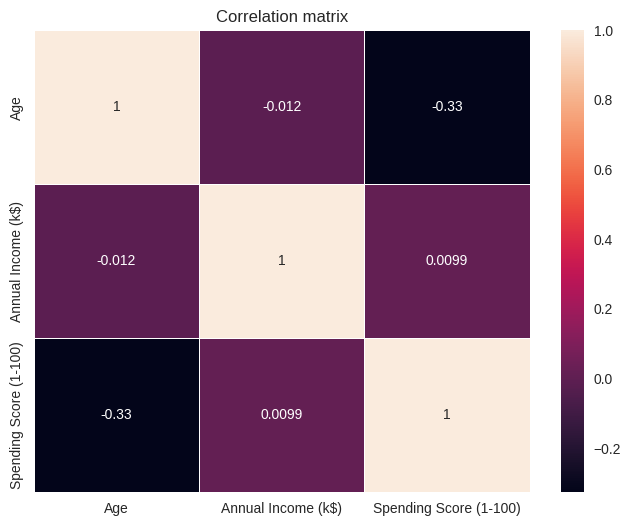

In [6]:
correlation_matrix = df.iloc[:, 1:].corr()
plt.figure(figsize=(8, 6))
sea.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

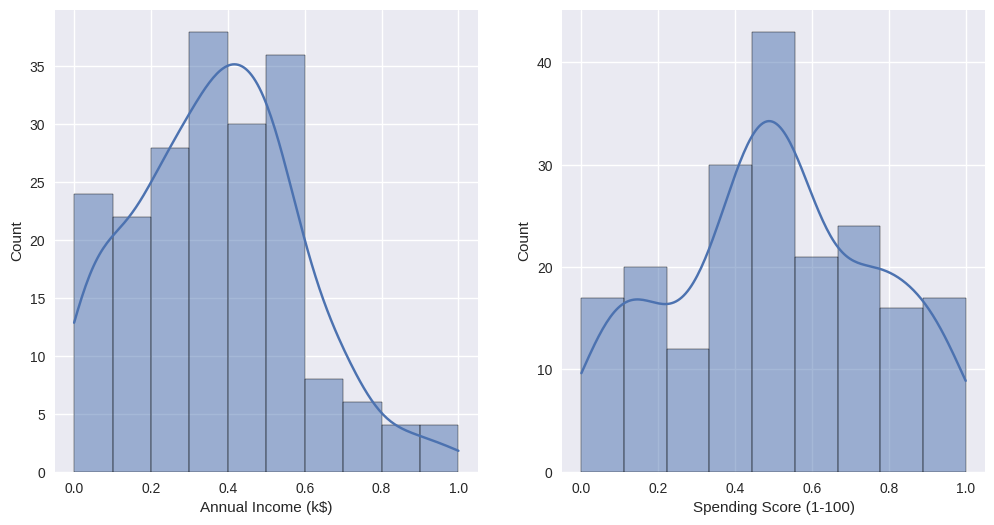

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sea.histplot(df['Annual Income (k$)'], kde=True)

plt.subplot(1, 2, 2)
sea.histplot(df['Spending Score (1-100)'], kde=True)



In [20]:
class HierarchicalClustering:
    def __init__(self, name):
        self.name = name
          
    def linkage(self, X, method="ward", metric="euclidean"):
        return scipy.cluster.hierarchy.linkage(X, method = method, metric = metric)
    
    def dendrogram(self, Z, title, plot=False,):
        plt.figure(figsize=(10, 10))
        dendrogram = scipy.cluster.hierarchy.dendrogram(Z)
        plt.title(title)
        plt.show() if plot else None
             

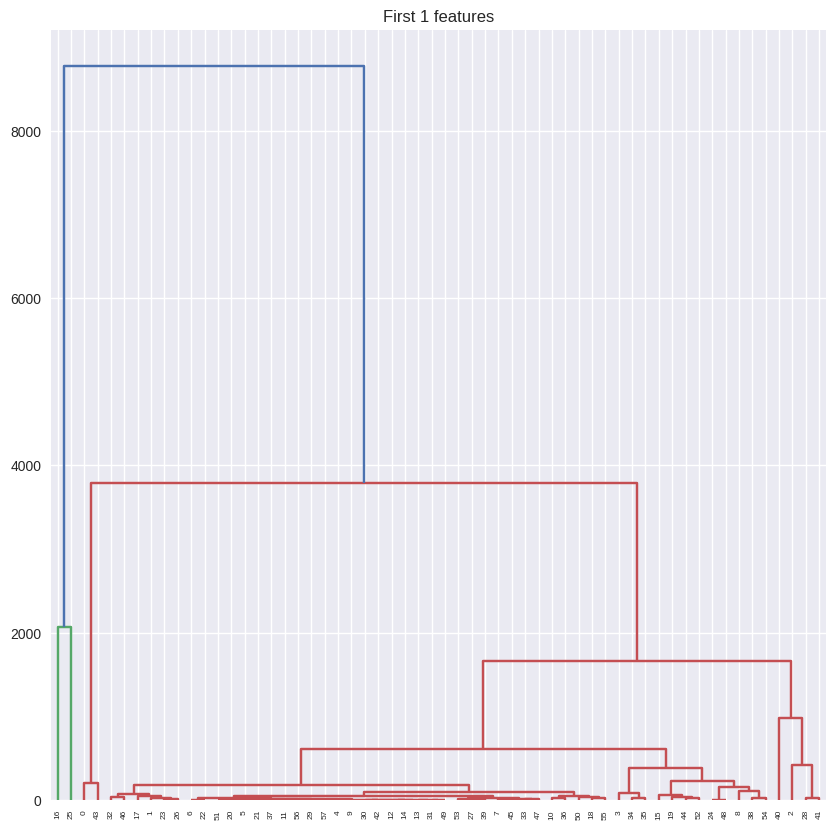

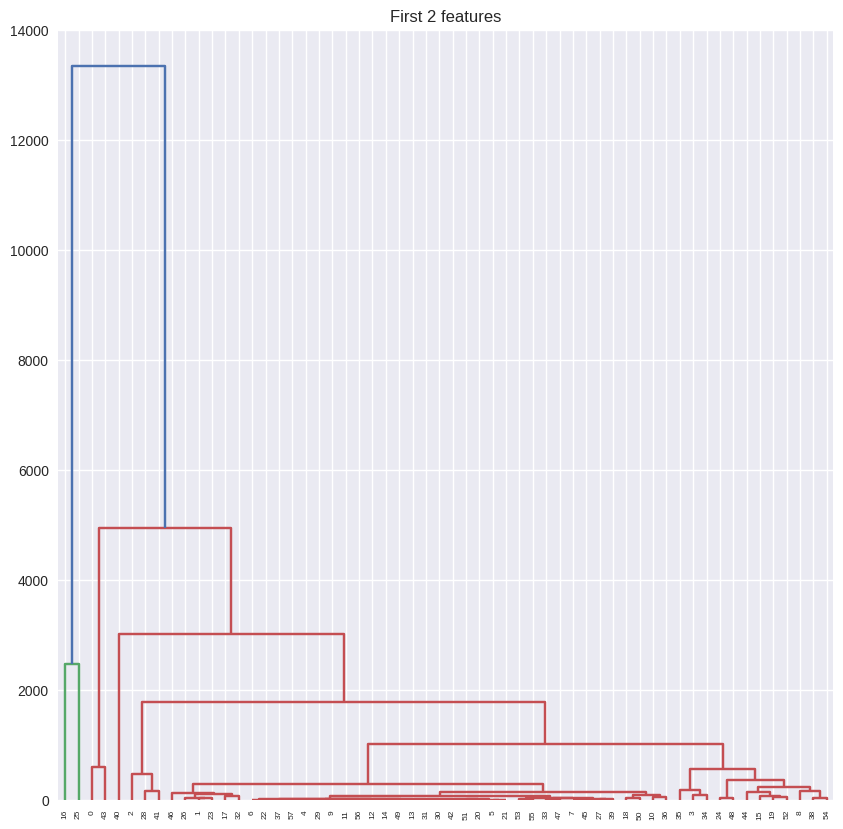

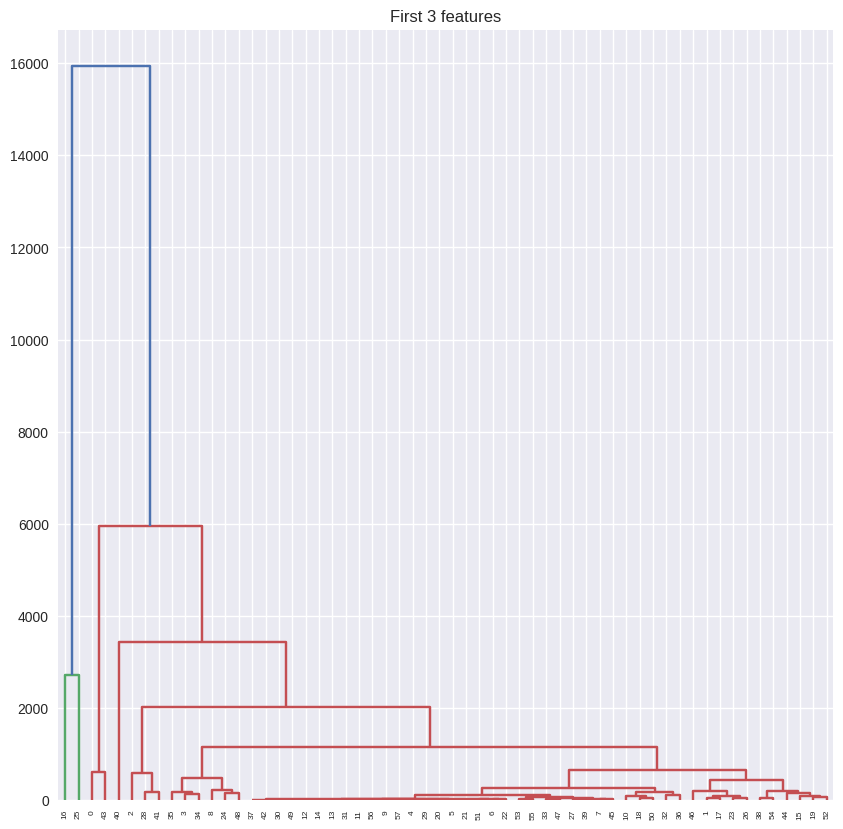

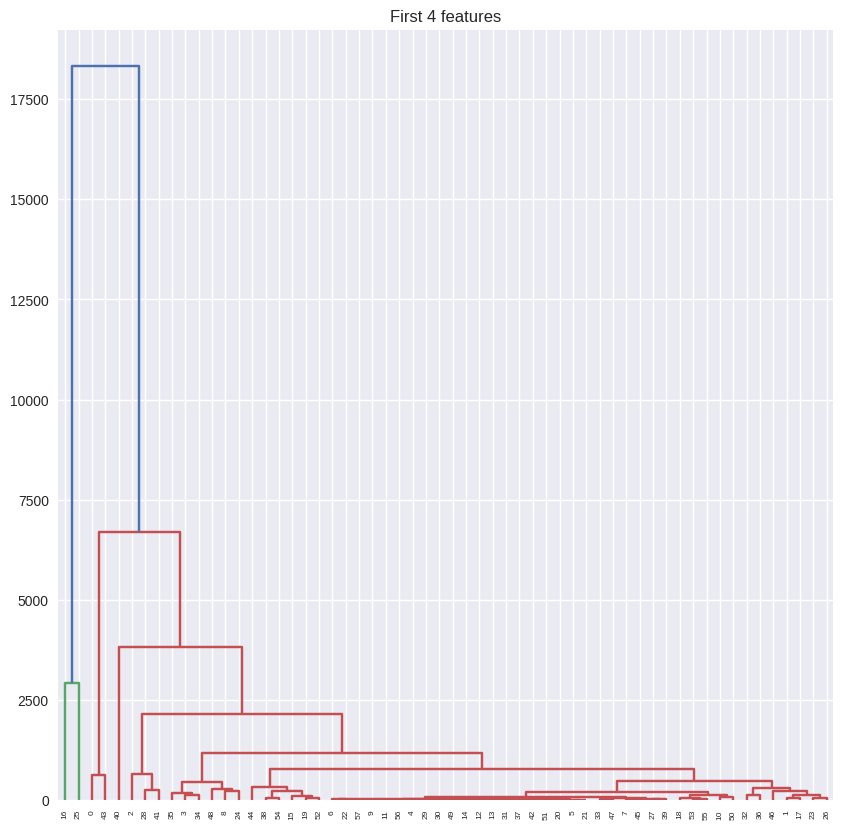

In [21]:
for i in range(1, 5):
    hc = HierarchicalClustering(name='customer')
    linkage = hc.linkage(df.values[:, :i], method="weighted")
    hc.dendrogram(linkage, title= f'First {i} features' )
    


In [22]:
df = pd.read_csv('./Data/gene.csv').drop(columns=['ID_REF'], axis = 0)
df.head()

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
0,5192.23000,5974.6500,5393.02000,5158.65000,5244.96000,5143.31000,4621.77000,5173.65000,5811.77000,5465.11000,4972.57000,4528.70000
1,301.50300,307.6770,362.59600,372.77600,299.98000,308.91200,311.88300,331.53300,344.16100,365.17200,357.14600,372.43600
2,1850.11000,2037.5400,1891.18000,1752.97000,1718.80000,1762.98000,1630.54000,1905.87000,2141.35000,1891.99000,1652.14000,1593.69000
3,927.98300,1140.8200,936.43300,918.44000,930.31300,926.49600,793.72900,936.18400,1041.49000,942.37700,891.35900,826.81100
4,5.24974,5.0173,5.09585,3.76912,5.54982,5.27357,3.79682,4.66623,5.68881,5.25432,4.66148,3.93062


In [23]:
df.describe()

,GSM613412,GSM613413,GSM613414,GSM613415,GSM613416,GSM613417,GSM613418,GSM613419,GSM613420,GSM613421,GSM613422,GSM613423
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,902.942908,1103.448382,977.960233,967.804369,990.323625,962.662128,793.212975,901.654306,1051.094418,1007.057900,989.723307,812.972737
std,2347.341750,2884.612469,2430.106171,2453.770193,2600.019635,2460.588236,1922.121259,2203.258179,2572.109346,2511.446097,2552.671818,1979.698530
min,0.006021,0.001961,0.871053,0.750540,1.503730,2.111260,2.251850,1.000970,2.214990,1.718300,1.499480,1.626220
25%,8.744407,8.258545,8.939060,6.682233,7.939070,8.603378,7.281975,8.042220,7.950700,9.215798,8.329560,7.030233
50%,111.646000,112.709600,137.322000,138.342000,117.218500,123.825500,122.413500,126.785500,141.171000,144.755500,131.748000,142.310000
75%,583.125000,636.832000,708.026250,756.888250,650.551000,646.980000,643.283250,660.882000,675.266250,733.397750,722.054250,679.184000
max,12998.800000,15354.800000,12978.300000,13179.300000,14184.400000,13620.100000,10651.400000,12105.900000,13148.400000,13188.000000,13811.000000,10858.900000


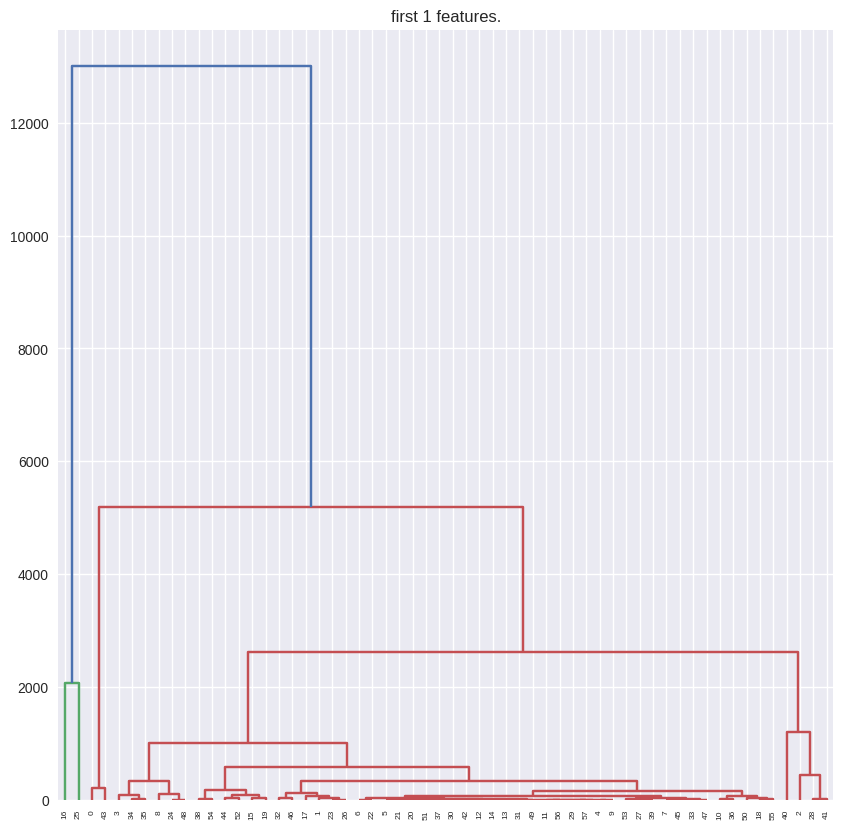

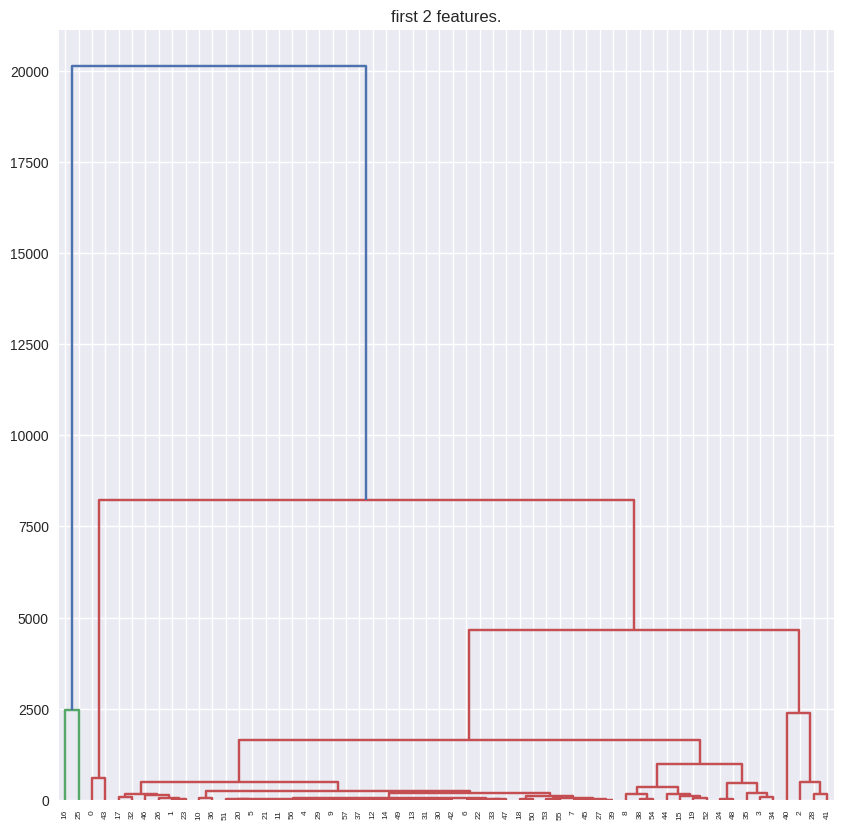

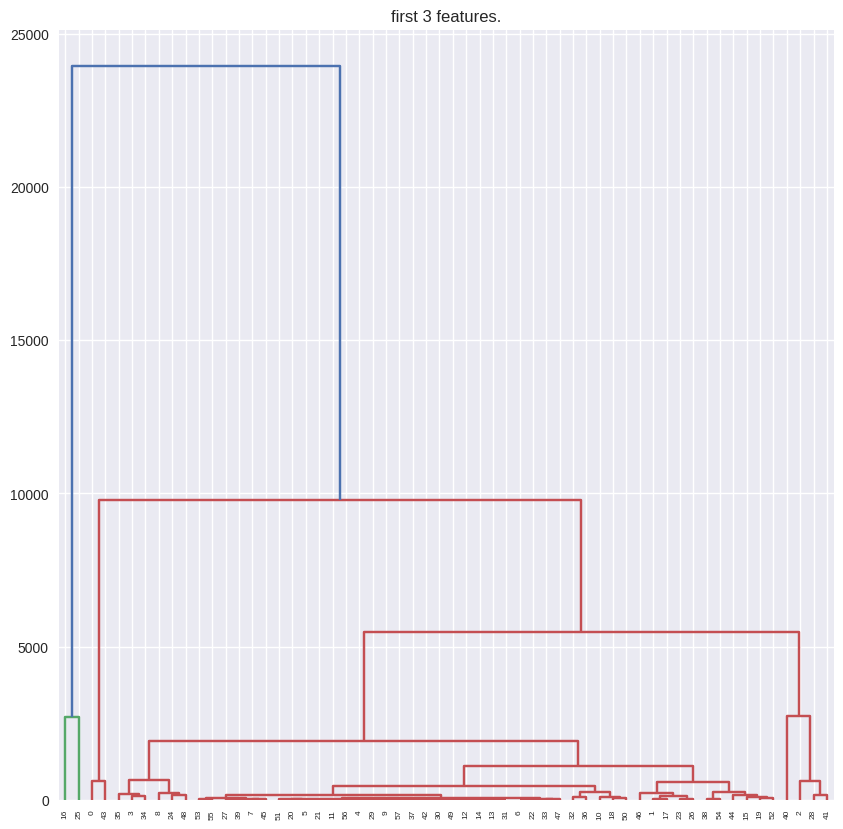

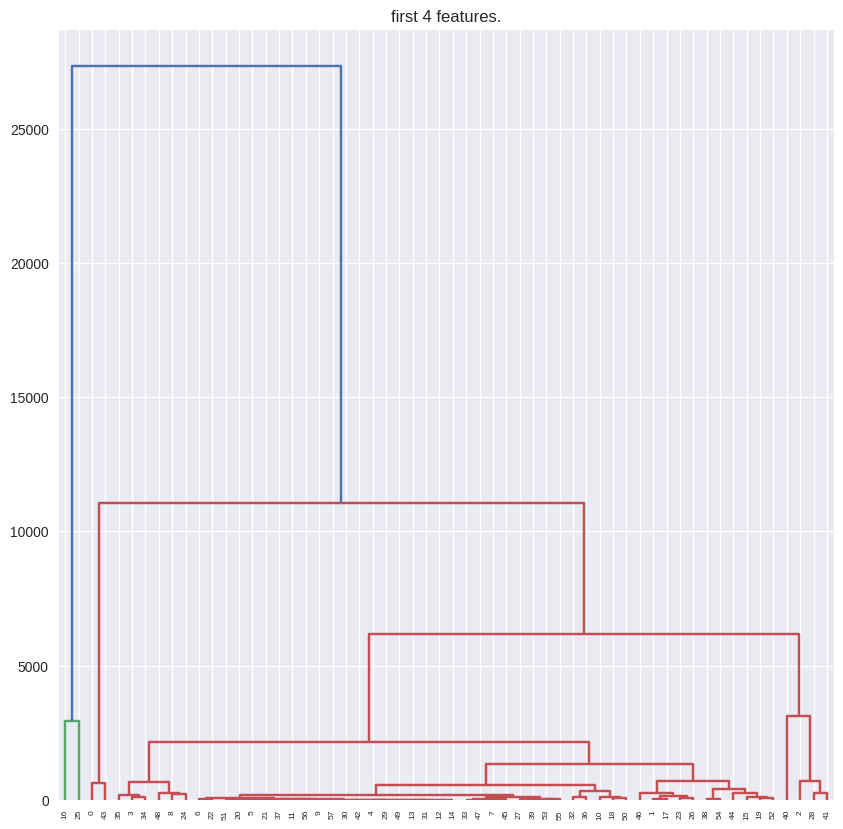

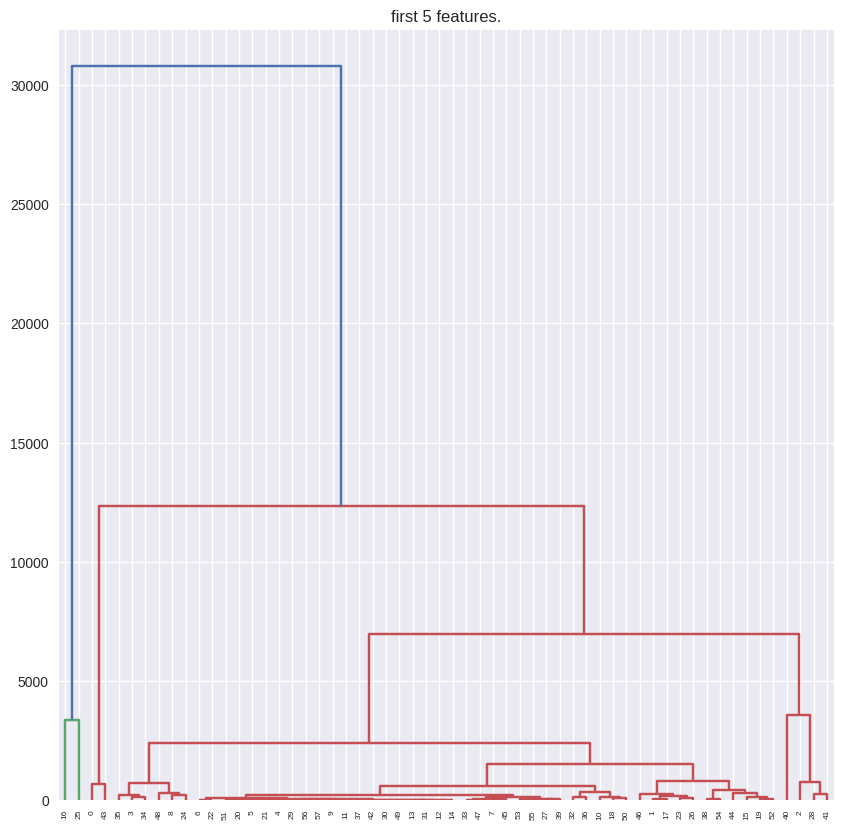

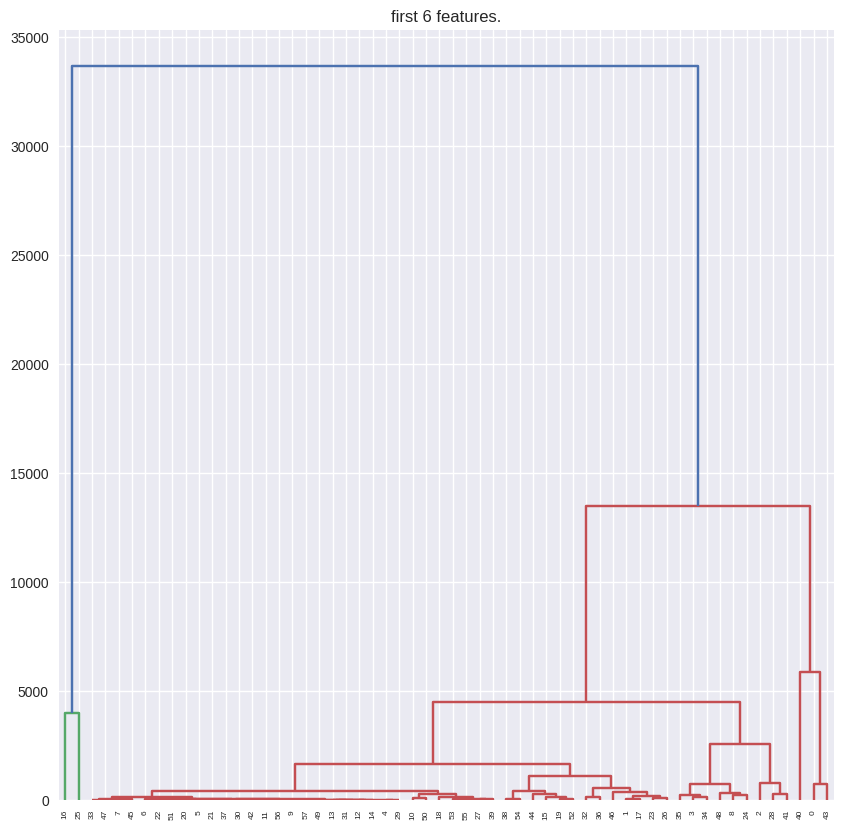

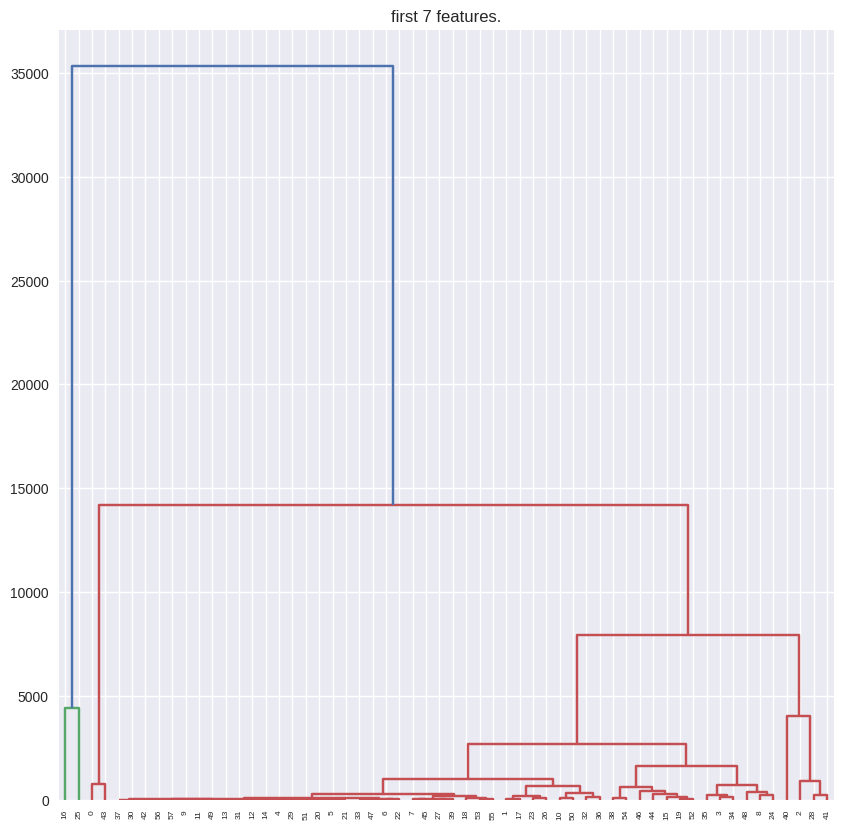

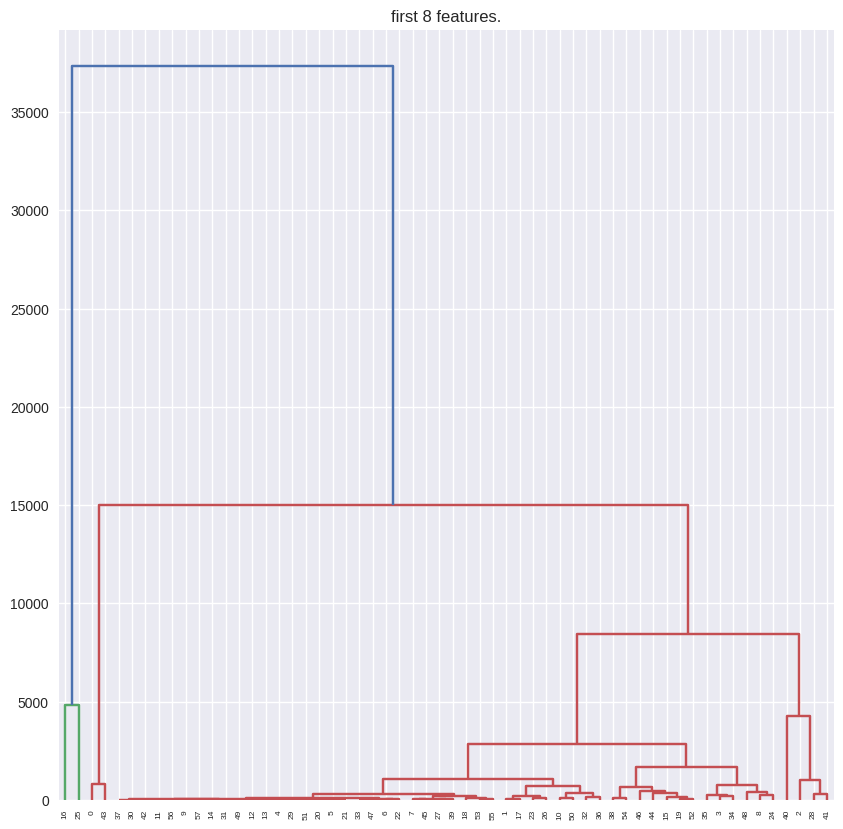

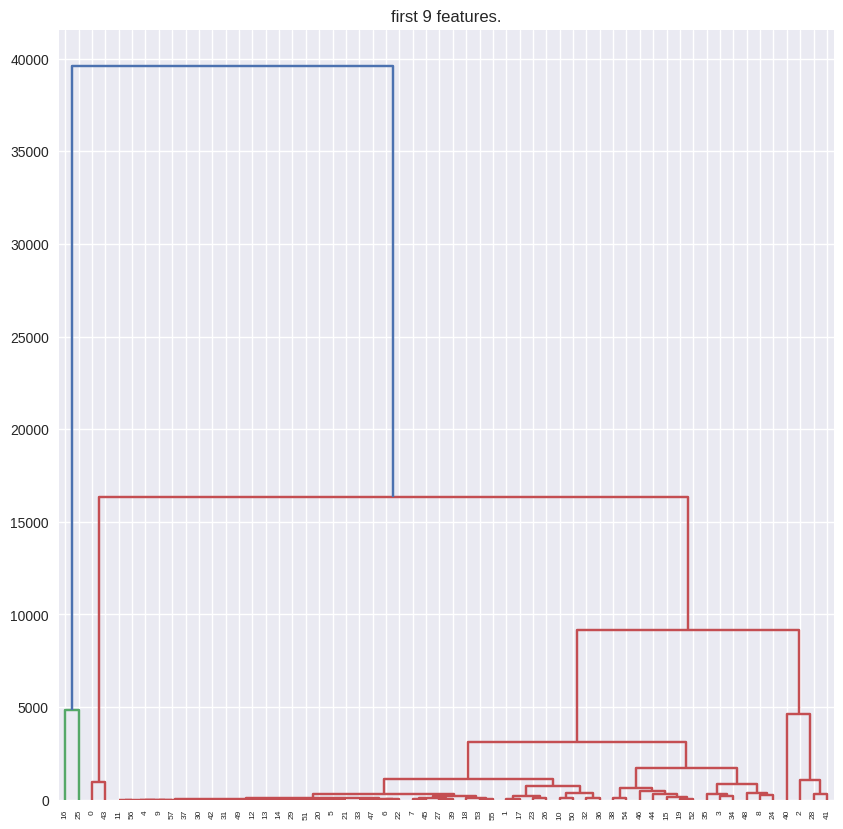

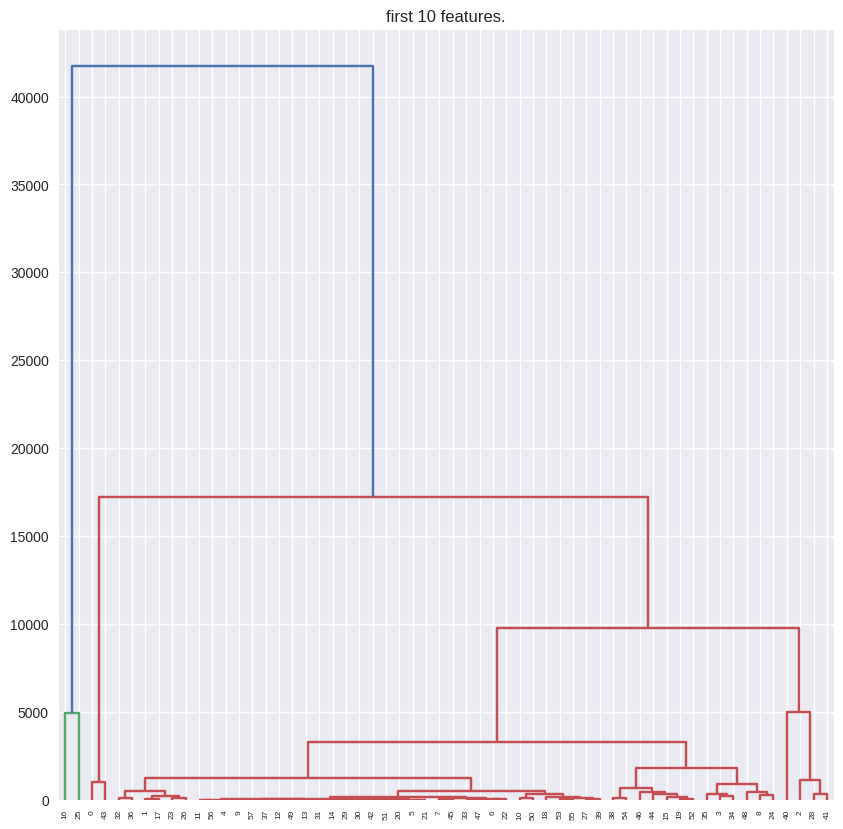

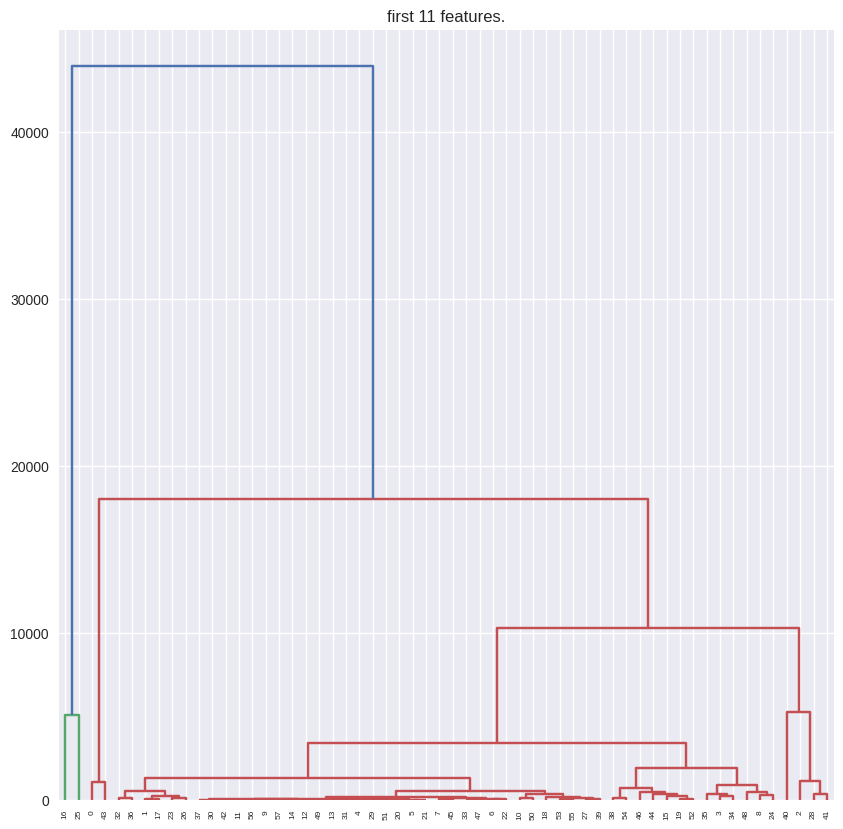

In [24]:
for i in range(1, 12):
    linkage_gene = hc.linkage(df.values[:, :i], method='complete')
    hc.dendrogram(linkage_gene, f'first {i} features.')

## Observations


1. For customer dataset, we observe that only taking the first feature gives a completely different dendogram while keeping the remaning features one by one produces simliar dendogram plots.
2. For gene dataser, we observe that varying features produces simliar dendogram plots. 